Ayyub Alzahem 3700203

<h3>Getting Started: Similarity measures </h3>

<h3> Do you remember what are Accuracy, Recall, Precision and
F-score? how to compute? </h3>

<b>Precision =</b> (TruePositives_1 + TruePositives_2) / ((TruePositives_1 + TruePositives_2) + (FalsePositives_1 + FalsePositives_2) )

<b>Recall =</b> (TruePositives_1 + TruePositives_2) / ((TruePositives_1 + TruePositives_2) + (FalseNegatives_1 + FalseNegatives_2))

<b>F-Measure =</b> (2 * Precision * Recall) / (Precision + Recall)

In [32]:
from __future__ import print_function
from nltk.metrics import *

Sentence1='There are many similarity measures used in NLTK package'.split()
Sentence2='There are many similarity measures are avaliable in NLTK '.split()

print('Accuracy = ',accuracy(Sentence1,Sentence2))

Accuracy =  0.5555555555555556


In [33]:
setSentence1=set(Sentence1)
setSentence2=set(Sentence2)

precision = precision(setSentence1,setSentence2)
recall = recall(setSentence1,setSentence2)

print('Precision = ',precision)
print('Recall = ',recall)

Precision =  0.875
Recall =  0.7777777777777778


In [34]:
f_measure = (2 * precision * recall) / (precision + recall)
print('F-measure = ',f_measure)

F-measure =  0.823529411764706


<h3> Exercise 1: For the given sentences, apply confusion_report
to get similarity between sentences. Write your code below
and the outputs. </h3>

In [35]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(Sentence1, Sentence2)

print('Confusion Matrix \n', confusion_matrix)

Confusion Matrix 
 [[0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]]


In [36]:
classification_report = classification_report(Sentence1, Sentence2)

print('Classification Report \n', classification_report)

Classification Report 
               precision    recall  f1-score   support

        NLTK       0.00      0.00      0.00         1
       There       1.00      1.00      1.00         1
         are       0.50      1.00      0.67         1
   avaliable       0.00      0.00      0.00         0
          in       0.00      0.00      0.00         1
        many       1.00      1.00      1.00         1
    measures       1.00      1.00      1.00         1
     package       0.00      0.00      0.00         1
  similarity       1.00      1.00      1.00         1
        used       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.45      0.50      0.47         9
weighted avg       0.50      0.56      0.52         9



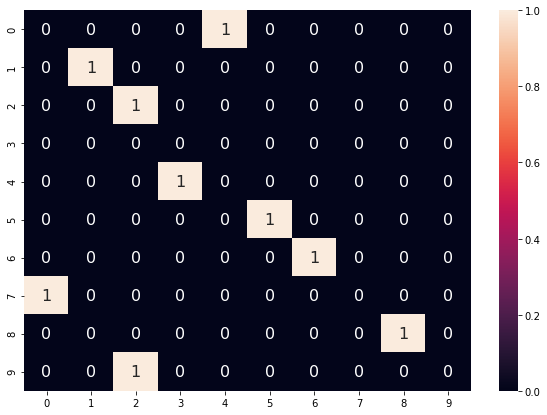

In [37]:
df_cm = pd.DataFrame(confusion_matrix)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

<h2> Similarity Measures in NLTK</h2>

<h3> Ethe edit distance algorithm (Levenshtien distance) </h3>

<h3> Exercise 2: For the two above words “relate” and
“relation”, What is the edit distance? Why? Write Steps!
Calculate the edit distance between “suggestion” and
“calculation”!  </h3>

<b>edit distance</b> is a way of quantifying how dissimilar two strings.

In [39]:
import nltk
from nltk.metrics import *

print(edit_distance("relate","relation"))
print(edit_distance("suggestion","calculation"))

3
7


<h3>  Jaccard's Coefficient </h3>

<b>Jaccard's coefficient</b>, or <b>Tanimoto coefficient</b>, may be defined as a measure of
the overlap of two sets, X and Y. It may be defined as follows:

Jaccard(𝑋, 𝑌) = |𝑋 ∩ 𝑌|/|𝑋𝑈𝑌|
<br>
Jaccard(𝑋, 𝑋) = 1
<br>
Jaccard(𝑋, 𝑌) = 0 𝑖𝑓 𝑋 ∩ 𝑌 = 0 

In [40]:
import nltk
from nltk.metrics import *

def jacc_similarity(query, document):
    first=set(query).intersection(set(document))
    second=set(query).union(set(document))
    return len(first)/len(second) 

X = set(Sentence1)
Y = set(Sentence2)

print(jaccard_distance(X,Y)) 

0.3


<h2> Other string similarity metrics  
</h2>

<h3> Binary distance </h3>

<b>Binary distance</b> is a string similarity metric. It returns the value 0.0 if two labels are
identical; otherwise, it returns the value 1.0.

In [41]:
def binary_distance(label1, label2):
    return 0.0 if label1 == label2 else 1.0

X=set(Sentence1)
Y=set(Sentence2)
binary_distance(X, Y) 

1.0

<h3> Masi distance </h3>


<b>Masi distance</b> is based on partial agreement when multiple labels are present. 

In [42]:
def masi(label1, label2):
    len_intersection = len(label1.intersection(label2))
    len_union = len(label1.union(label2))
    len_label1 = len(label1)
    len_label2 = len(label2) 
    if len_label1 == len_label2 and len_label1 == len_intersection:
        m = 1
    elif len_intersection == min(len_label1, len_label2):
        m = 0.67
    elif len_intersection > 0:
        m = 0.33
    else:
        m = 0
    return 1 - (len_intersection / float(len_union)) * m

X=set([10,20,30,40])
Y=set([30,50,70])
masi(X, Y) 

0.945

<h3> Exercise 3. Given a directory, demonstrate how to apply
similarity measures to find similar files.</h3>

In [46]:
import nltk
from nltk.metrics import *

def jacc_similarity(query, document):
    first=set(query).intersection(set(document))
    second=set(query).union(set(document))
    return len(first)/len(second) 

file1 = open(r'C:\Users\ayyub\Desktop\file.txt').read()
file2 = open(r'C:\Users\ayyub\Desktop\file2.txt').read()

text1 = set(file1)
text2 = set(file2)

print('text1\n',text1)
print('text2\n',text2)

print('\n\nSimilarity =', jaccard_distance(text1,text2)) 

text1
 {' ', '1', 'o', ',', 'b', 'f', 'm', 's', 'c', 'l', 'w', 'n', 'k', 'O', 'V', 'u', 'i', '9', 'p', 'a', 'D', 'q', 'v', 'y', 'd', 'h', 't', 'I', '.', 'C', 'r', 'g', '-', 'e'}
text2
 {' ', 'o', ',', 'f', 'm', 's', 'c', 'l', 'w', 'n', 'k', 'u', 'i', 'p', 'a', 'v', 'y', 'd', 'h', 't', '.', 'C', 'r', 'g', 'e'}


Similarity = 0.2647058823529412
